In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import xgboost as xgb
#conda install -c anaconda py-xgboost

In [2]:
train =pd.read_excel('gmr_oxcgrt_train.xlsx',  index_col=[0], parse_dates=[0])
test = pd.read_excel('gmr_oxcgrt_test.xlsx',  index_col=[0], parse_dates=[0])

In [3]:
train =  pd.DataFrame(train)
test = pd.DataFrame(test)
train.head()

,workplaces,active,day_of_year,week_of_year,workplaces_1,active_1,workplaces_2,active_2,workplaces_3,active_3,...,24,25,26,27,28,29,30,31,cluster_1,cluster_2
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,-28,0,46,7,-28,0,-28,0,-28,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-16,4,0,47,7,-28,0,-28,0,-28,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-17,5,0,48,7,4,0,-28,0,-28,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-18,6,0,49,7,5,0,4,0,-28,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-19,5,0,50,8,6,0,5,0,4,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5292 entries, 2020-08-01 to 2020-09-11
Columns: 216 entries, workplaces to cluster_2
dtypes: int64(216)
memory usage: 8.8 MB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21117 entries, 2020-02-15 to 2020-07-31
Columns: 216 entries, workplaces to cluster_2
dtypes: int64(216)
memory usage: 35.0 MB


In [6]:
test.head()

,workplaces,active,day_of_year,week_of_year,workplaces_1,active_1,workplaces_2,active_2,workplaces_3,active_3,...,24,25,26,27,28,29,30,31,cluster_1,cluster_2
date,,,,,,,,,,,,,,,,,,,,,
2020-08-01,-66,9918,214,31,-24,9894,-38,9800,-16,9811,...,0,0,0,0,0,0,0,0,0,1
2020-08-02,-68,9916,215,31,-66,9918,-24,9894,-38,9800,...,0,0,0,0,0,0,0,0,0,1
2020-08-03,-39,9790,216,31,-68,9916,-66,9918,-24,9894,...,0,0,0,0,0,0,0,0,0,1
2020-08-04,-23,9825,217,31,-39,9790,-68,9916,-66,9918,...,0,0,0,0,0,0,0,0,0,1
2020-08-05,-19,9793,218,32,-23,9825,-39,9790,-68,9916,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X_train = train[train.columns.drop(['workplaces', 'active'])] #remove label y countrycode (xgboost no soporta strings)
y_train = train['workplaces']

X_test = test[test.columns.drop(['workplaces', 'active'])] #remove label y countrycode (xgboost no soporta strings)
y_test = test['workplaces']

In [8]:
y_train

date
2020-02-15   -28
2020-02-16     4
2020-02-17     5
2020-02-18     6
2020-02-19     5
              ..
2020-07-27   -19
2020-07-28   -20
2020-07-29   -22
2020-07-30   -34
2020-07-31   -68
Name: workplaces, Length: 21117, dtype: int64

In [9]:
X_test

,day_of_year,week_of_year,workplaces_1,active_1,workplaces_2,active_2,workplaces_3,active_3,workplaces_4,active_4,...,24,25,26,27,28,29,30,31,cluster_1,cluster_2
date,,,,,,,,,,,,,,,,,,,,,
2020-08-01,214,31,-24,9894,-38,9800,-16,9811,-12,9740,...,0,0,0,0,0,0,0,0,0,1
2020-08-02,215,31,-66,9918,-24,9894,-38,9800,-16,9811,...,0,0,0,0,0,0,0,0,0,1
2020-08-03,216,31,-68,9916,-66,9918,-24,9894,-38,9800,...,0,0,0,0,0,0,0,0,0,1
2020-08-04,217,31,-39,9790,-68,9916,-66,9918,-24,9894,...,0,0,0,0,0,0,0,0,0,1
2020-08-05,218,32,-23,9825,-39,9790,-68,9916,-66,9918,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-07,251,36,8,1286,1,1286,-15,1286,-17,1209,...,0,0,0,0,0,0,0,0,0,1
2020-09-08,252,36,-15,1633,8,1286,1,1286,-15,1286,...,0,0,0,0,0,0,0,0,0,1
2020-09-09,253,37,-16,1693,-15,1633,8,1286,1,1286,...,0,0,0,0,0,0,0,0,0,1


In [10]:
y_test

date
2020-08-01   -66
2020-08-02   -68
2020-08-03   -39
2020-08-04   -23
2020-08-05   -19
              ..
2020-09-07   -15
2020-09-08   -16
2020-09-09   -16
2020-09-10   -17
2020-09-11   -15
Name: workplaces, Length: 5292, dtype: int64

In [11]:
for n_estimators in [50, 100, 250, 1000]:
  for max_depth in [5, 10, 50, 100]:
    model = xgb.XGBRegressor(n_estimators= n_estimators, max_depth = max_depth, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, verbose=True) #stop if 50 consequent rounds without decrease of error  
# Change verbose to True if you want to see it train

y_pred = model.predict(X_test)
    
rmse = sk.metrics.mean_squared_error(y_test, y_pred, squared = False)
print(rmse, n_estimators, max_depth)

[21:08:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:30.8399	validation_1-rmse:24.4227
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:28.0601	validation_1-rmse:22.1951
[2]	validation_0-rmse:25.5763	validation_1-rmse:20.2571
[3]	validation_0-rmse:23.3717	validation_1-rmse:18.4945
[4]	validation_0-rmse:21.4151	validation_1-rmse:16.9281
[5]	validation_0-rmse:19.6678	validation_1-rmse:15.6161
[6]	validation_0-rmse:18.1315	validation_1-rmse:14.4327
[7]	validation_0-rmse:16.774	validation_1-rmse:13.3856
[8]	validation_0-rmse:15.5774	validation_1-rmse:12.5141
[9]	validation_0-rmse:14.5166	validation_1-rmse:11.7758
[10]	validation_0-rmse:13.5947	validation_1-rmse:11.1269
[11]	validation_0-rmse:12.789	validation_1-rmse:10.5995
[12]	validation_0-rmse:12.0892	validation_1-rmse:10.1

[31]	validation_0-rmse:2.13731	validation_1-rmse:10.4608
[32]	validation_0-rmse:1.98864	validation_1-rmse:10.5037
[33]	validation_0-rmse:1.85156	validation_1-rmse:10.5463
[34]	validation_0-rmse:1.72521	validation_1-rmse:10.6001
[35]	validation_0-rmse:1.60838	validation_1-rmse:10.6404
[36]	validation_0-rmse:1.50015	validation_1-rmse:10.6834
[37]	validation_0-rmse:1.40021	validation_1-rmse:10.7233
[38]	validation_0-rmse:1.30814	validation_1-rmse:10.7553
[39]	validation_0-rmse:1.22226	validation_1-rmse:10.7894
[40]	validation_0-rmse:1.14338	validation_1-rmse:10.8192
[41]	validation_0-rmse:1.07058	validation_1-rmse:10.846
[42]	validation_0-rmse:1.00266	validation_1-rmse:10.8734
[43]	validation_0-rmse:0.939893	validation_1-rmse:10.8987
[44]	validation_0-rmse:0.880701	validation_1-rmse:10.9224
[45]	validation_0-rmse:0.825976	validation_1-rmse:10.9461
[46]	validation_0-rmse:0.774679	validation_1-rmse:10.9639
[47]	validation_0-rmse:0.726965	validation_1-rmse:10.9814
[48]	validation_0-rmse:0.68

[66]	validation_0-rmse:7.05879	validation_1-rmse:9.72074
[67]	validation_0-rmse:7.04428	validation_1-rmse:9.72015
[68]	validation_0-rmse:7.03705	validation_1-rmse:9.7618
[69]	validation_0-rmse:7.02645	validation_1-rmse:9.76374
[70]	validation_0-rmse:7.01214	validation_1-rmse:9.82926
[71]	validation_0-rmse:7.00099	validation_1-rmse:9.82352
[72]	validation_0-rmse:6.98461	validation_1-rmse:9.81263
[73]	validation_0-rmse:6.97901	validation_1-rmse:9.81388
Stopping. Best iteration:
[23]	validation_0-rmse:8.51267	validation_1-rmse:8.33027

[21:09:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:30.7492	validation_1-rmse:24.3769
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:27.8794	validation_1-rmse:22.1496
[2]	validation_0-rmse:25.3084	validation_1-rmse:20.1845
[3]	validation_0-r

[49]	validation_0-rmse:0.640788	validation_1-rmse:11.0093
[50]	validation_0-rmse:0.602165	validation_1-rmse:11.0303
[51]	validation_0-rmse:0.566326	validation_1-rmse:11.0463
[52]	validation_0-rmse:0.533092	validation_1-rmse:11.06
[53]	validation_0-rmse:0.501875	validation_1-rmse:11.0737
[54]	validation_0-rmse:0.472663	validation_1-rmse:11.086
[55]	validation_0-rmse:0.445342	validation_1-rmse:11.0966
[56]	validation_0-rmse:0.419924	validation_1-rmse:11.1072
[57]	validation_0-rmse:0.395705	validation_1-rmse:11.1156
[58]	validation_0-rmse:0.373016	validation_1-rmse:11.1231
[59]	validation_0-rmse:0.351877	validation_1-rmse:11.1321
[60]	validation_0-rmse:0.331692	validation_1-rmse:11.1424
[61]	validation_0-rmse:0.312826	validation_1-rmse:11.1524
[62]	validation_0-rmse:0.295349	validation_1-rmse:11.1594
[63]	validation_0-rmse:0.278962	validation_1-rmse:11.166
[64]	validation_0-rmse:0.263583	validation_1-rmse:11.172
[65]	validation_0-rmse:0.248948	validation_1-rmse:11.1774
[66]	validation_0-r

[41]	validation_0-rmse:7.4958	validation_1-rmse:9.3001
[42]	validation_0-rmse:7.46287	validation_1-rmse:9.36922
[43]	validation_0-rmse:7.44642	validation_1-rmse:9.43357
[44]	validation_0-rmse:7.41417	validation_1-rmse:9.50797
[45]	validation_0-rmse:7.38491	validation_1-rmse:9.50392
[46]	validation_0-rmse:7.35693	validation_1-rmse:9.50373
[47]	validation_0-rmse:7.33683	validation_1-rmse:9.58736
[48]	validation_0-rmse:7.32352	validation_1-rmse:9.59498
[49]	validation_0-rmse:7.30113	validation_1-rmse:9.59397
[50]	validation_0-rmse:7.27935	validation_1-rmse:9.59458
[51]	validation_0-rmse:7.2593	validation_1-rmse:9.59124
[52]	validation_0-rmse:7.23934	validation_1-rmse:9.67222
[53]	validation_0-rmse:7.23136	validation_1-rmse:9.67519
[54]	validation_0-rmse:7.21286	validation_1-rmse:9.66721
[55]	validation_0-rmse:7.1983	validation_1-rmse:9.65566
[56]	validation_0-rmse:7.18009	validation_1-rmse:9.64788
[57]	validation_0-rmse:7.1672	validation_1-rmse:9.64574
[58]	validation_0-rmse:7.15851	valid

[25]	validation_0-rmse:3.34143	validation_1-rmse:10.1443
[26]	validation_0-rmse:3.09454	validation_1-rmse:10.2052
[27]	validation_0-rmse:2.86936	validation_1-rmse:10.2709
[28]	validation_0-rmse:2.66284	validation_1-rmse:10.3221
[29]	validation_0-rmse:2.47275	validation_1-rmse:10.3708
[30]	validation_0-rmse:2.29794	validation_1-rmse:10.4145
[31]	validation_0-rmse:2.13731	validation_1-rmse:10.4608
[32]	validation_0-rmse:1.98864	validation_1-rmse:10.5037
[33]	validation_0-rmse:1.85156	validation_1-rmse:10.5463
[34]	validation_0-rmse:1.72521	validation_1-rmse:10.6001
[35]	validation_0-rmse:1.60838	validation_1-rmse:10.6404
[36]	validation_0-rmse:1.50015	validation_1-rmse:10.6834
[37]	validation_0-rmse:1.40021	validation_1-rmse:10.7233
[38]	validation_0-rmse:1.30814	validation_1-rmse:10.7553
[39]	validation_0-rmse:1.22226	validation_1-rmse:10.7894
[40]	validation_0-rmse:1.14338	validation_1-rmse:10.8192
[41]	validation_0-rmse:1.07058	validation_1-rmse:10.846
[42]	validation_0-rmse:1.00266	v

[16]	validation_0-rmse:10.1185	validation_1-rmse:8.95722
[17]	validation_0-rmse:9.76941	validation_1-rmse:8.80152
[18]	validation_0-rmse:9.47853	validation_1-rmse:8.61586
[19]	validation_0-rmse:9.22643	validation_1-rmse:8.48564
[20]	validation_0-rmse:9.01021	validation_1-rmse:8.40569
[21]	validation_0-rmse:8.8152	validation_1-rmse:8.35319
[22]	validation_0-rmse:8.64993	validation_1-rmse:8.34826
[23]	validation_0-rmse:8.51267	validation_1-rmse:8.33027
[24]	validation_0-rmse:8.386	validation_1-rmse:8.37746
[25]	validation_0-rmse:8.2863	validation_1-rmse:8.42755
[26]	validation_0-rmse:8.19742	validation_1-rmse:8.4159
[27]	validation_0-rmse:8.10636	validation_1-rmse:8.40236
[28]	validation_0-rmse:8.02631	validation_1-rmse:8.40339
[29]	validation_0-rmse:7.95866	validation_1-rmse:8.49237
[30]	validation_0-rmse:7.90095	validation_1-rmse:8.68829
[31]	validation_0-rmse:7.84122	validation_1-rmse:8.6802
[32]	validation_0-rmse:7.79174	validation_1-rmse:8.68664
[33]	validation_0-rmse:7.7503	validat

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:27.8106	validation_1-rmse:22.1555
[2]	validation_0-rmse:25.1959	validation_1-rmse:20.1234
[3]	validation_0-rmse:22.8461	validation_1-rmse:18.403
[4]	validation_0-rmse:20.7324	validation_1-rmse:16.8801
[5]	validation_0-rmse:18.826	validation_1-rmse:15.6103
[6]	validation_0-rmse:17.1103	validation_1-rmse:14.4503
[7]	validation_0-rmse:15.5648	validation_1-rmse:13.501
[8]	validation_0-rmse:14.1724	validation_1-rmse:12.7436
[9]	validation_0-rmse:12.9146	validation_1-rmse:12.0765
[10]	validation_0-rmse:11.7816	validation_1-rmse:11.5235
[11]	validation_0-rmse:10.758	validation_1-rmse:11.1103
[12]	validation_0-rmse:9.83236	validation_1-rmse:10.781
[13]	validation_0-rmse:8.99862	validation_1-rmse:10.5364
[14]	validation_0-rmse:8.2414	validation_1-rmse:10.3737
[15]	validation_0-rmse:7.55278	validation_1-rmse:10.2292
[16]	validation_0-rmse:6.92908	validation_1-rmse:10.1308
[17]	validation_0-rmse:6.36302	validat

[68]	validation_0-rmse:0.210358	validation_1-rmse:11.2172
[69]	validation_0-rmse:0.198902	validation_1-rmse:11.2218
Stopping. Best iteration:
[19]	validation_0-rmse:5.38508	validation_1-rmse:9.9875

9.987498016956534 1000 100


In [12]:
from sklearn.metrics import mean_squared_error

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 9.982013


In [13]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

scores = np.sqrt(-1*sk.model_selection.cross_val_score(model, X_train, y_train, scoring= "neg_mean_squared_error", cv=10, n_jobs=-1))
rmse.mean(), rmse.std()


(9.98201330239351, 0.0)

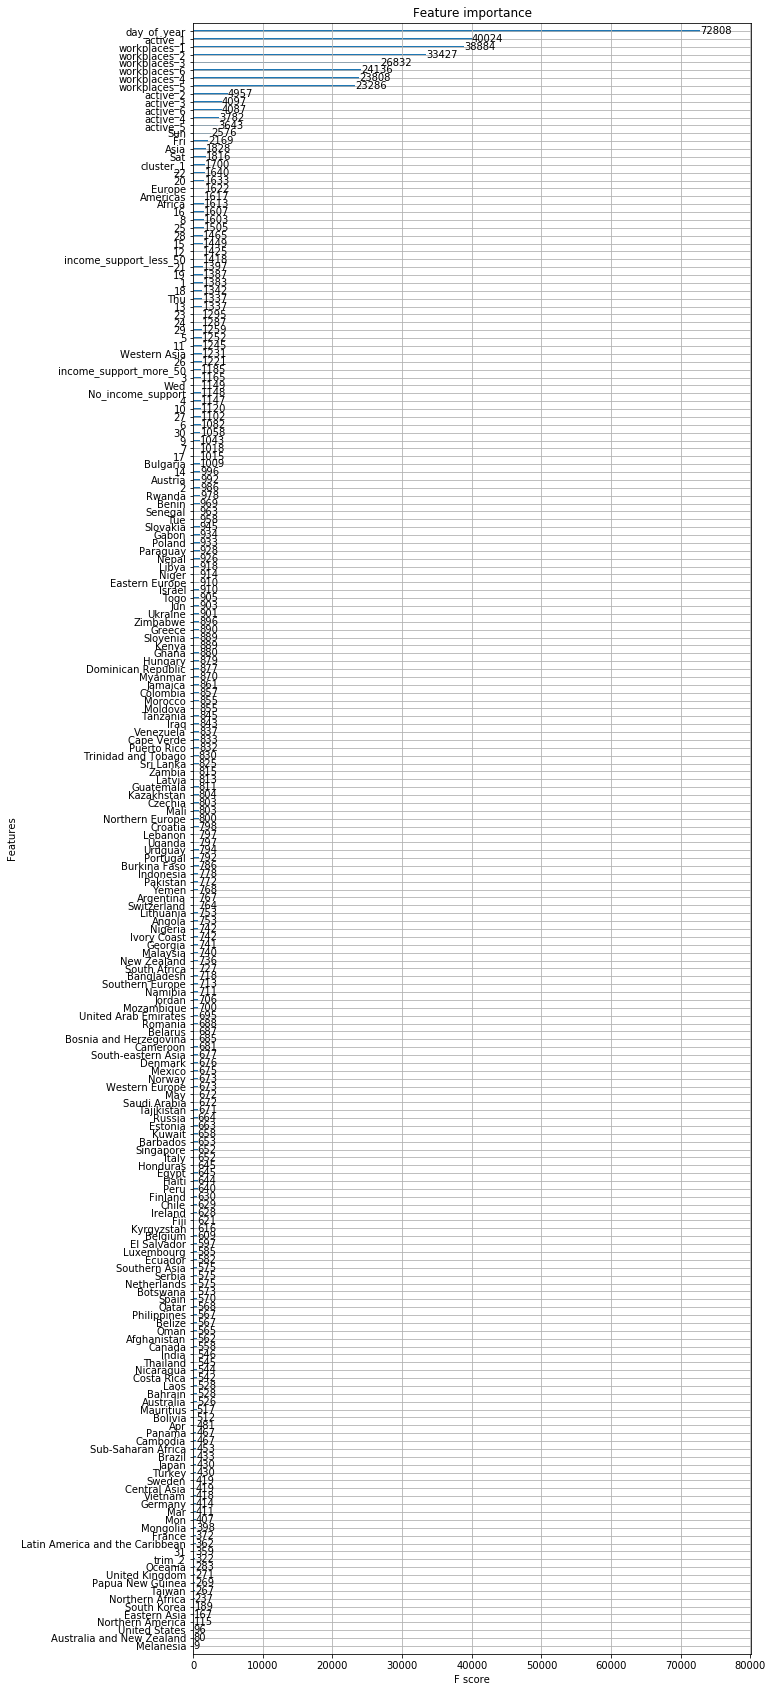

In [14]:
x=xgb.plot_importance(model)
x.figure.set_size_inches(10, 30) 